In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
coin_gecko_16 = pd.read_csv('coin_gecko_2022-03-16.csv')
coin_gecko_17 = pd.read_csv('coin_gecko_2022-03-17.csv')

coin_gecko_16.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [4]:
coin_gecko_16.isnull().sum().sum(), coin_gecko_17.isnull().sum().sum()

(12, 17)

In [5]:
coin_gecko_17.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17


In [6]:
# Merge the two datasets
coin_gecko = pd.concat([coin_gecko_16, coin_gecko_17], axis=0)
coin_gecko.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [7]:
coin_gecko.isna().sum().sum()

29

# Exploratory Data Analysis

## Data cleaning

In [8]:
coin_gecko.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 78.1+ KB


In [9]:
coin_gecko.isna().sum()

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

In [10]:
# Handle missing values
def handle_missing_values(df, col):
    df[col].fillna(df[col].median(), inplace=True)
    return df

coin_gecko = handle_missing_values(coin_gecko, '1h')
coin_gecko = handle_missing_values(coin_gecko, '24h')
coin_gecko = handle_missing_values(coin_gecko, '7d')
coin_gecko = handle_missing_values(coin_gecko, '24h_volume')

coin_gecko.isna().sum().sum()

0

## Visualizations

In [13]:
# Market trends in the last 1h, 24h, 7days 
coin_gecko[['1h', '24h', '7d']].describe().T.style.set_table_styles([{'selector': 'th', 'props': [('background-color', '#000000'), ('color', 'white')]}])


,count,mean,std,min,25%,50%,75%,max
1h,1000.000000,0.009697,0.026842,-0.704000,0.001000,0.006000,0.019000,0.095000
24h,1000.000000,0.023683,0.059098,-0.646000,0.001000,0.016000,0.035000,0.577000
7d,1000.000000,0.023366,0.228869,-0.558000,-0.040250,-0.000500,0.036000,4.608000


* 1h column refers to the percentage change in the last 1 hour
* 24h column refers to the percentage change in the last 24 hours
* 7d column refers to the percentage change in the last 7 days

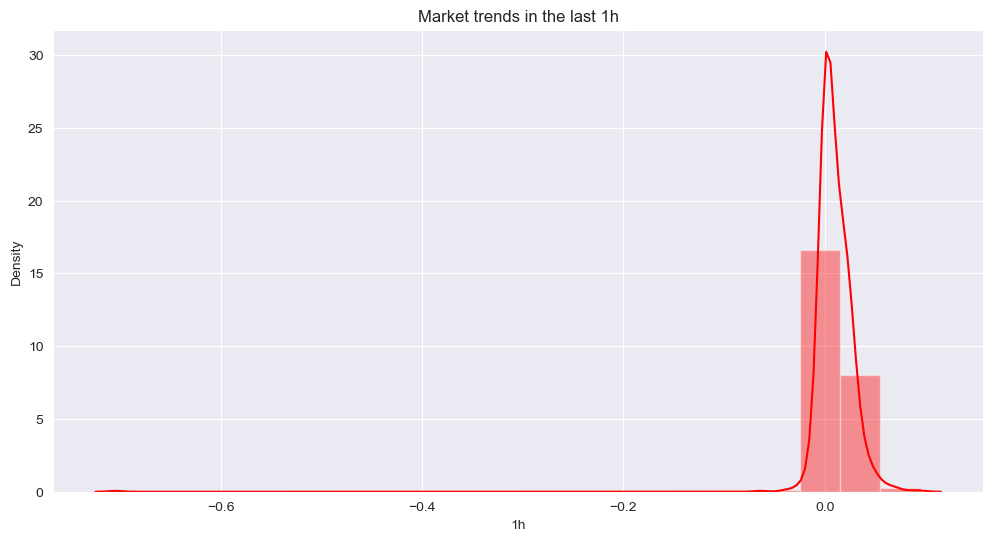

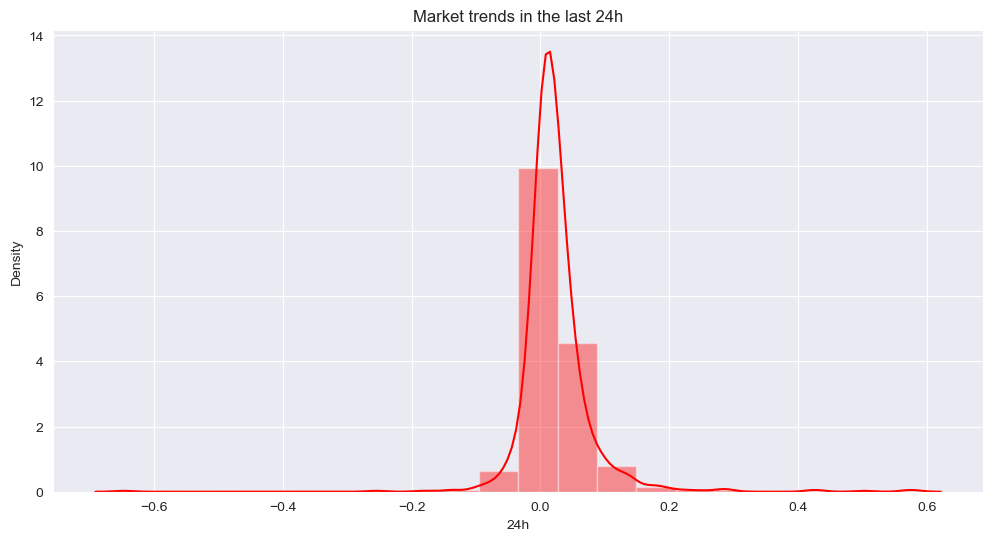

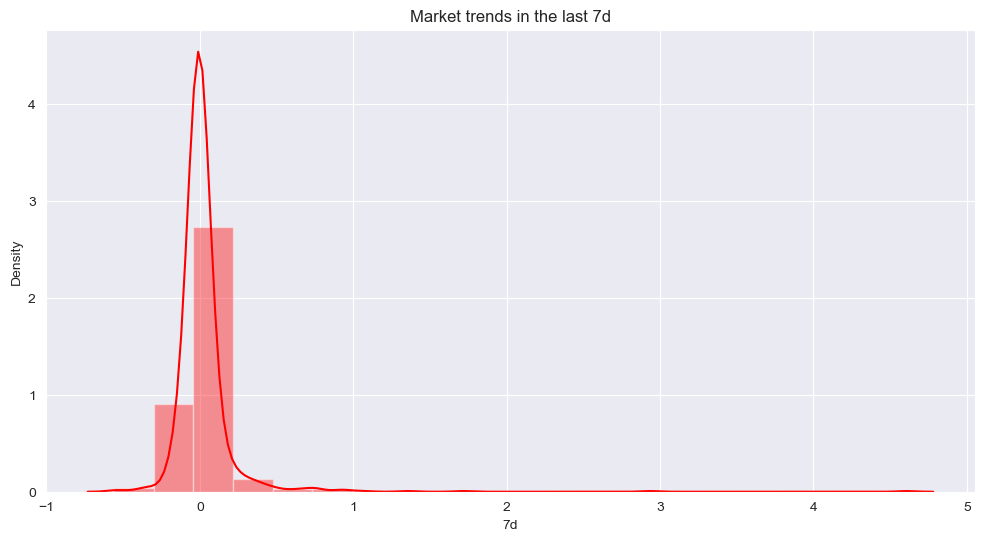

In [14]:
def plot_trends(df, col, title):
    plt.figure(figsize=(12, 6))
    plt.title(title)
    sns.distplot(df[col], bins=20, color='red')
    plt.show()

plot_trends(coin_gecko, '1h', 'Market trends in the last 1h')
plot_trends(coin_gecko, '24h', 'Market trends in the last 24h')
plot_trends(coin_gecko, '7d', 'Market trends in the last 7d')

In [15]:
coin_gecko[['1h', '24h', '7d', 'price']].describe().T.style.set_table_styles([{'selector': 'th', 'props': [('background-color', '#000000'), ('color', 'white')]}])

,count,mean,std,min,25%,50%,75%,max
1h,1000.000000,0.009697,0.026842,-0.704000,0.001000,0.006000,0.019000,0.095000
24h,1000.000000,0.023683,0.059098,-0.646000,0.001000,0.016000,0.035000,0.577000
7d,1000.000000,0.023366,0.228869,-0.558000,-0.040250,-0.000500,0.036000,4.608000
price,1000.000000,656.105988,4584.654569,0.000000,0.194055,1.095000,7.232500,41217.270000


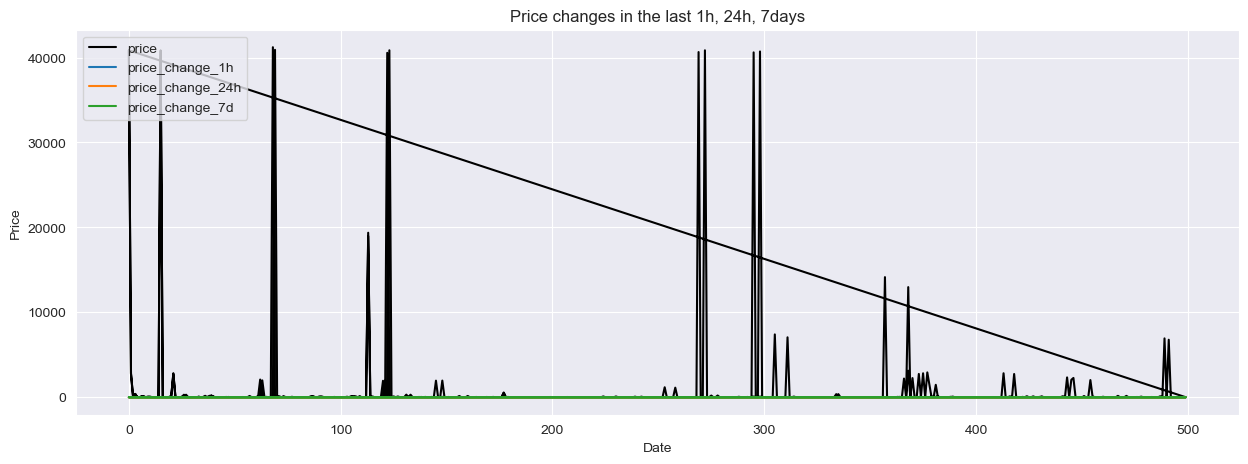

In [19]:
# Plot price changes in the last 1h, 24h, 7days 
fig, ax = plt.subplots(
    figsize=(15, 5),)
ax.plot(coin_gecko.index, coin_gecko['price'], label='price', color='black')
ax.plot(coin_gecko.index, coin_gecko['1h'],
        label='price_change_1h')    
ax.plot(coin_gecko.index, coin_gecko['24h'],
        label='price_change_24h')
ax.plot(coin_gecko.index, coin_gecko['7d'],
        label='price_change_7d')

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Price changes in the last 1h, 24h, 7days')
ax.legend(loc='upper left')
plt.show();

In [20]:
# Let's see the top 10 coins by market capitalization
top_10 = coin_gecko.sort_values(by='mkt_cap', ascending=False).head(10)
top_10

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


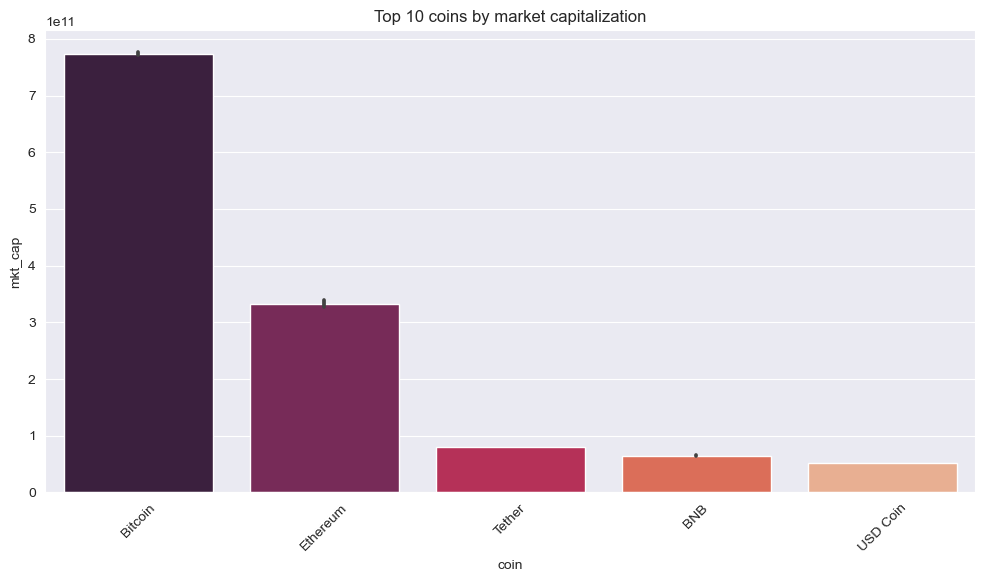

In [22]:
plt.figure(figsize=(12, 6))
plt.title('Top 10 coins by market capitalization')
sns.barplot(x=top_10['coin'], y=top_10['mkt_cap'], palette='rocket')
plt.xticks(rotation=45)
plt.show();

* Market cap is the total market value of a cryptocurrency's circulating supply. It is analogous to the free-float capitalization in the stock market. Market cap = Current Price x Circulating Supply.

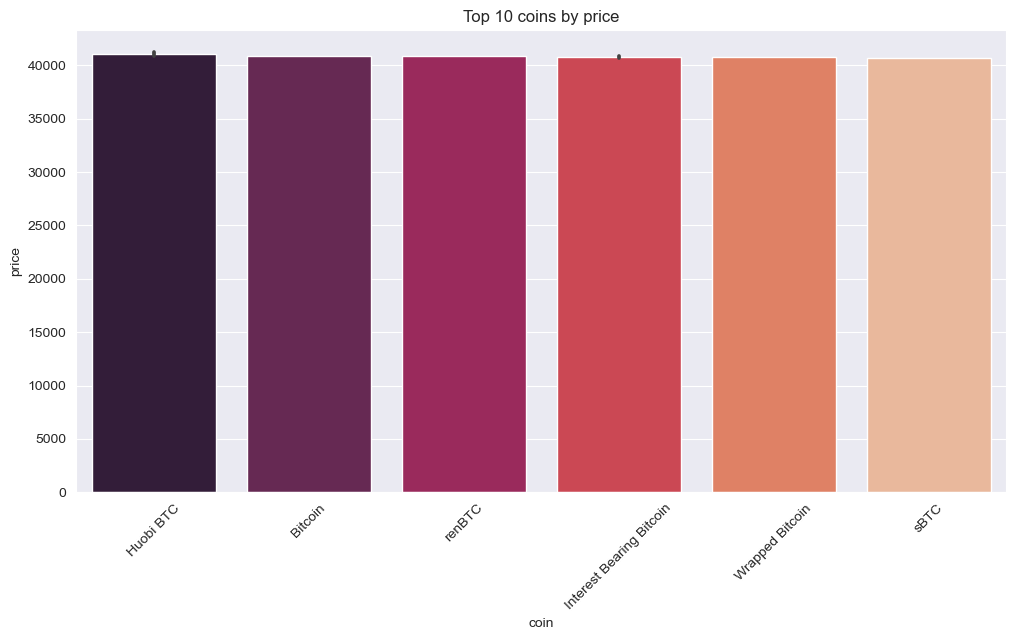

In [23]:
# Let's see the top 10 coins by price
top_10 = coin_gecko.sort_values(by='price', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.title('Top 10 coins by price')
sns.barplot(x=top_10['coin'], y=top_10['price'], palette='rocket')
plt.xticks(rotation=45)
plt.show();

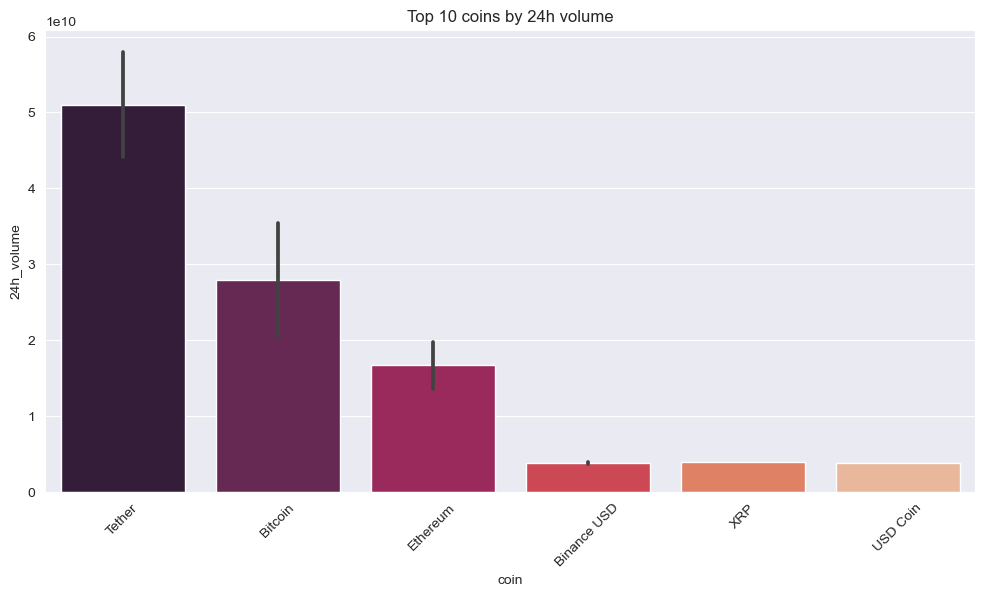

In [24]:
# Let's see the top 10 coins by 24h volume
top_10 = coin_gecko.sort_values(by='24h_volume', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.title('Top 10 coins by 24h volume')
sns.barplot(x=top_10['coin'], y=top_10['24h_volume'], palette='rocket')
plt.xticks(rotation=45)
plt.show();

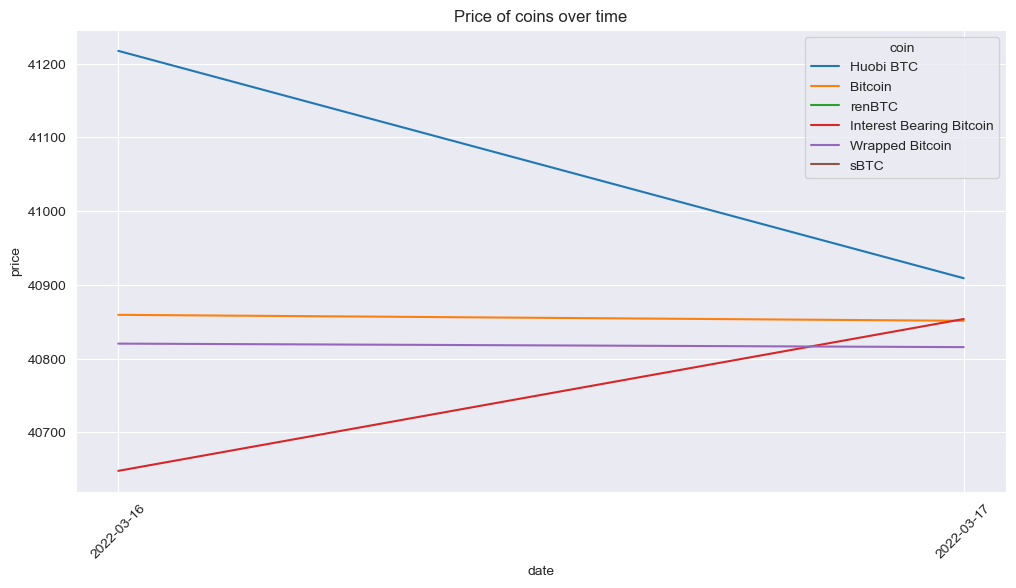

In [26]:
top_10 = coin_gecko.sort_values(by='price', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.title('Price of coins over time')
sns.lineplot(x='date', y='price', hue='coin', data=top_10)
plt.xticks(rotation=45)
plt.show();

In [ ]:
corr = coin_gecko.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='summer')
plt.show();